## Linear Regression Case Studey
### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

#### The company wants to know:
- *Which variables are significant in predicting the demand for shared bikes.*
- *How well those variables describe the bike demands.*

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### **Business Goal**:
I am required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.   Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Necessary Libraries
We are going to use below librabries for our overall analysis
- Numpy
- Pandas
- Matplotlib
- Seaborn
- Sklearn
- Statsmodels


In [84]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#Sklearn and Statsmodel we will import when require.

### Reading Data and checking Integrity
We will read the data now and check avrous aspects e.g shape,datatypes, info etc.

In [85]:
#Importing the data
df = pd.read_csv ('day.csv')
df.head(10)
#Number of features/columns
len(df.columns)# It is 16
#Size of the overall dataset
df.size #11680 rows
df.head()
#Full Information
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### EDA
#### Data Checking and cleaning

### Data Dintionary

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

*After analyzing the data dictionary i have gotten that **cnt** is the dependant variable and others are independant or feature.*

In [86]:
#Checking for null value
df.isnull().sum() #No null values
df.nunique() #No of unique values for each column
#Checking Datatypes
df.dtypes
#Fetaure dteday is a date thus converting it into dattime object
df['dteday'] = pd.to_datetime(df['dteday'],format="%d-%m-%Y")
df.dtypes
df.head(5)
#As per data dictionary instant is index which we do not require thus dropping the column
df.drop(['instant'],axis=1,inplace=True)

df.head()
#You can observe in the dataset that some of the variables like 
#'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with 
#them (as can be seen in the data dictionary). These numeric values associated with the labels
#may indicate that there is some order to them - which is actually not the case 
#(Check the data dictionary and think why). 
#So, it is advisable to convert such feature values into categorical string values before 
#proceeding with model building. Please refer the data dictionary to get a better understanding of 
#all the independent variables.

#Converting Numerical into Categorical data as suggested
#Renaming Columns
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)
df.head()

#Changing categorical variables with appropriate values
df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['month'] = df['month'].map({i:calendar.month_abbr[i] for i in range(1,13)})
df['weekday'] = df['weekday'].map({0:"tuesday",1:"wednesday",2:"thrusday",3:"friday",4:"saturday",5:"sunday",6:"monday"})
df['weathersit'] = df['weathersit'].map({1:'clear',2:'misty',3:'light_snow_rain',4:'heavy_snow_rain'})
df['year'] = df['year'].map({0:'2018',1:'2019'})

df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2018-01-01,spring,2018,Jan,0,monday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,2018,Jan,0,tuesday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,2018,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,2018,Jan,0,thrusday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,2018,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
#Dropping dteday as we do not need it
df.drop (['dteday'],axis=1,inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,2018,Jan,0,monday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,tuesday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,thrusday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [88]:
#We do not require casual and registered as well as casual+registered  = count
df.drop(['casual','registered'], inplace=True, axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,monday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,tuesday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,thrusday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [89]:
#Checking for missing and unique values
df.isnull().sum()
#No Null
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
count         695
dtype: int64

In [90]:
### Dividing Data into Numerical and Categorical segment

In [91]:
num_cols=["temp","atemp","humidity","windspeed","count"]
cat_cols=["season","year","month","holiday","weekday","workingday","weathersit"]

### Plotting For Univariate and Bivariate Analysis

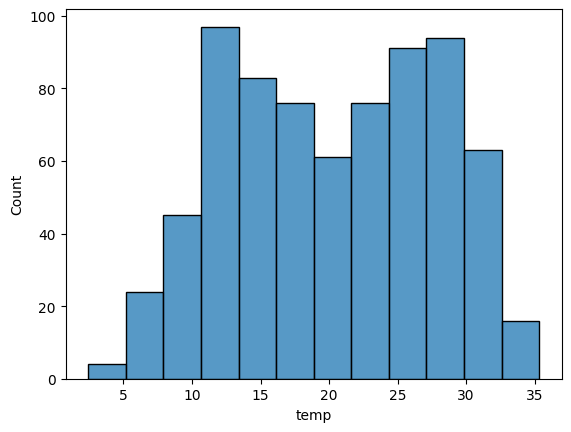

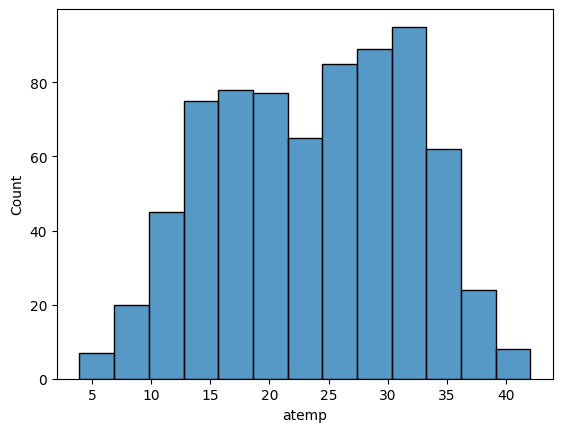

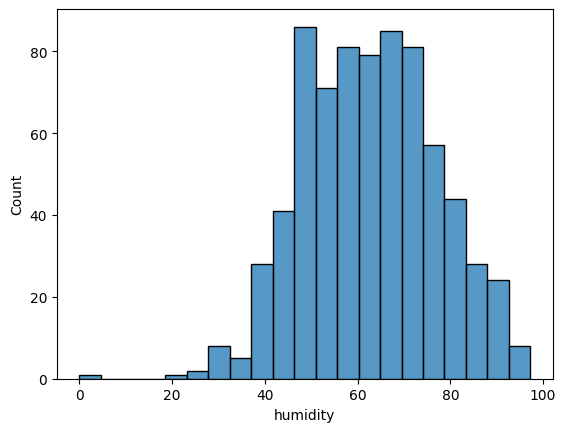

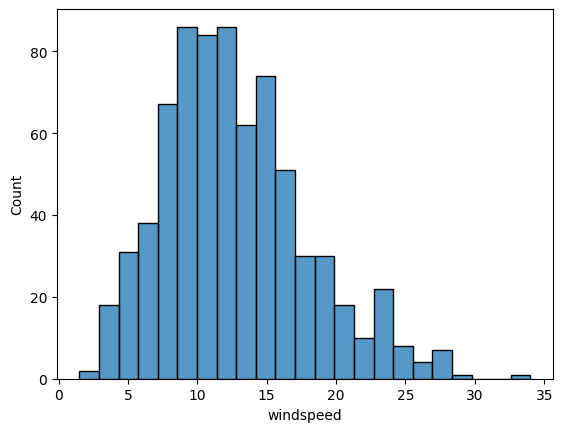

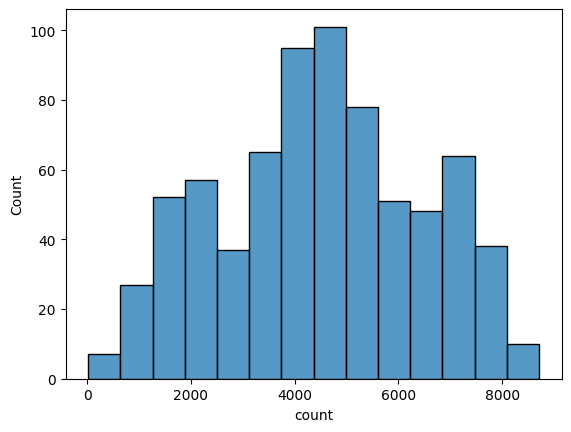

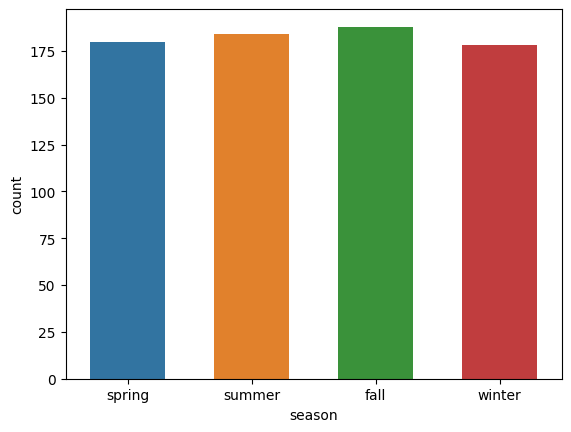

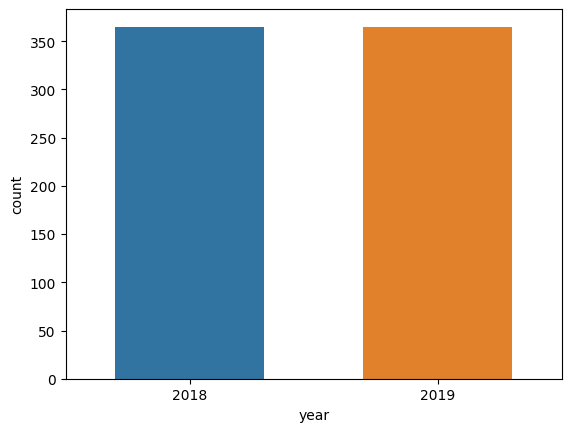

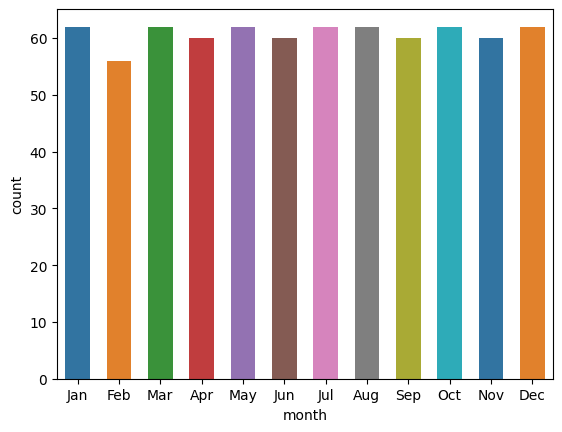

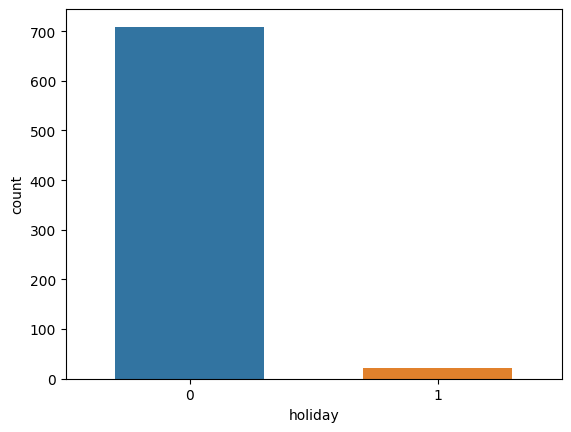

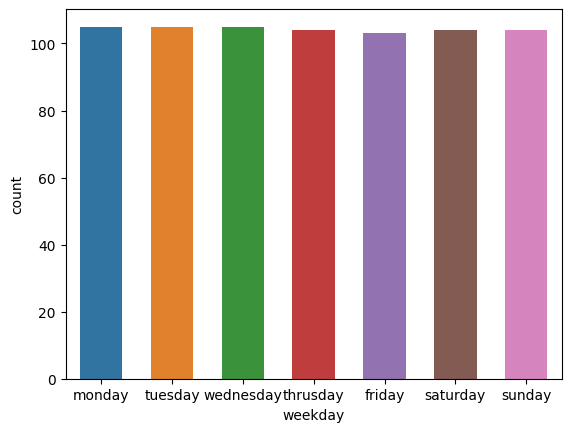

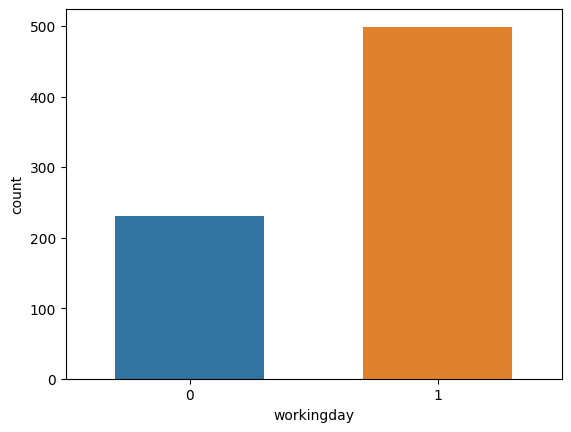

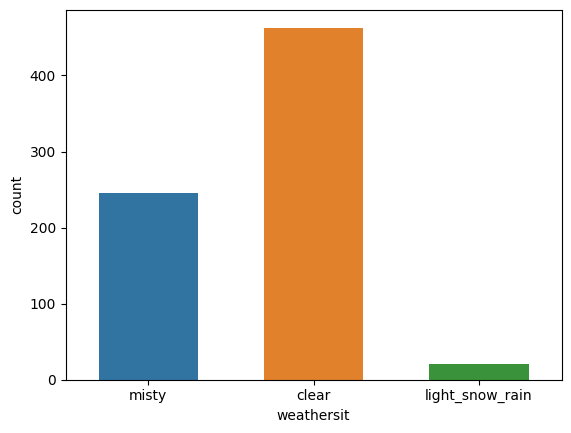

In [92]:
# Univariate Analysis
for i in num_cols:
    sns.histplot(x=df[i],bins='auto')
    plt.show()
for i in cat_cols:
    sns.countplot(x=df[i],width=0.6,palette=sns.color_palette())
    plt.show()
#We can see a Faily Linear relationship between data

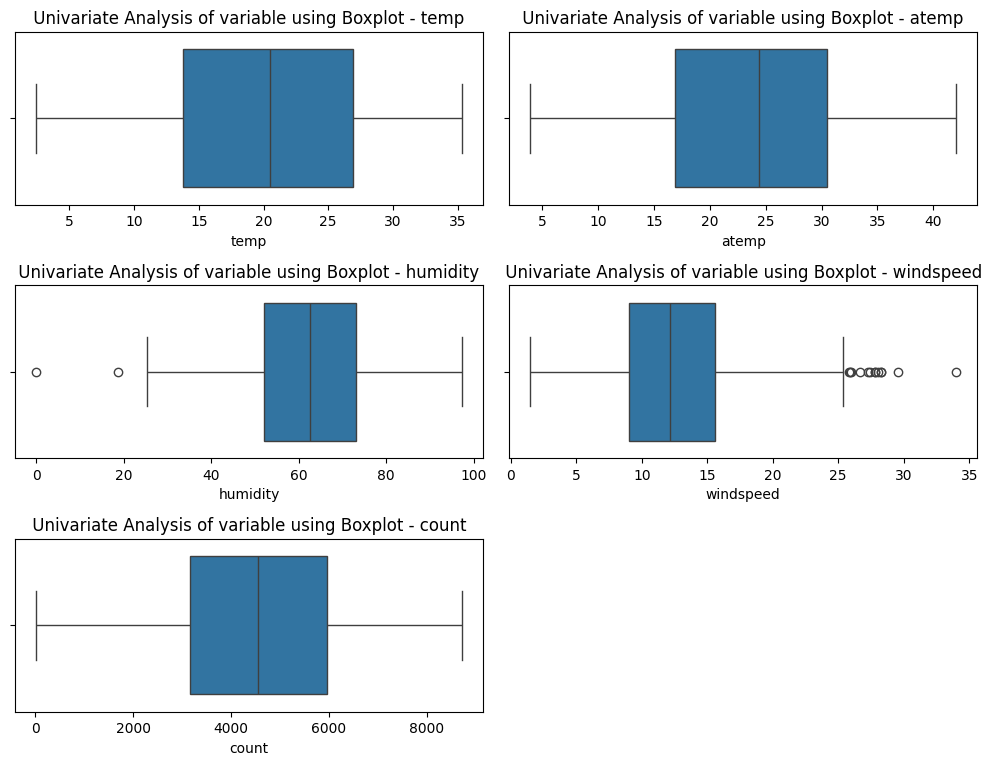

In [93]:
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot( x=df[col] , palette=sns.color_palette() )
    plt.title( f' Univariate Analysis of variable using Boxplot - {col} ' )
plt.tight_layout()
plt.show()

#windspeed and humidity has outliers

In [94]:
### Bivariate Analysis

<Figure size 2000x1500 with 0 Axes>

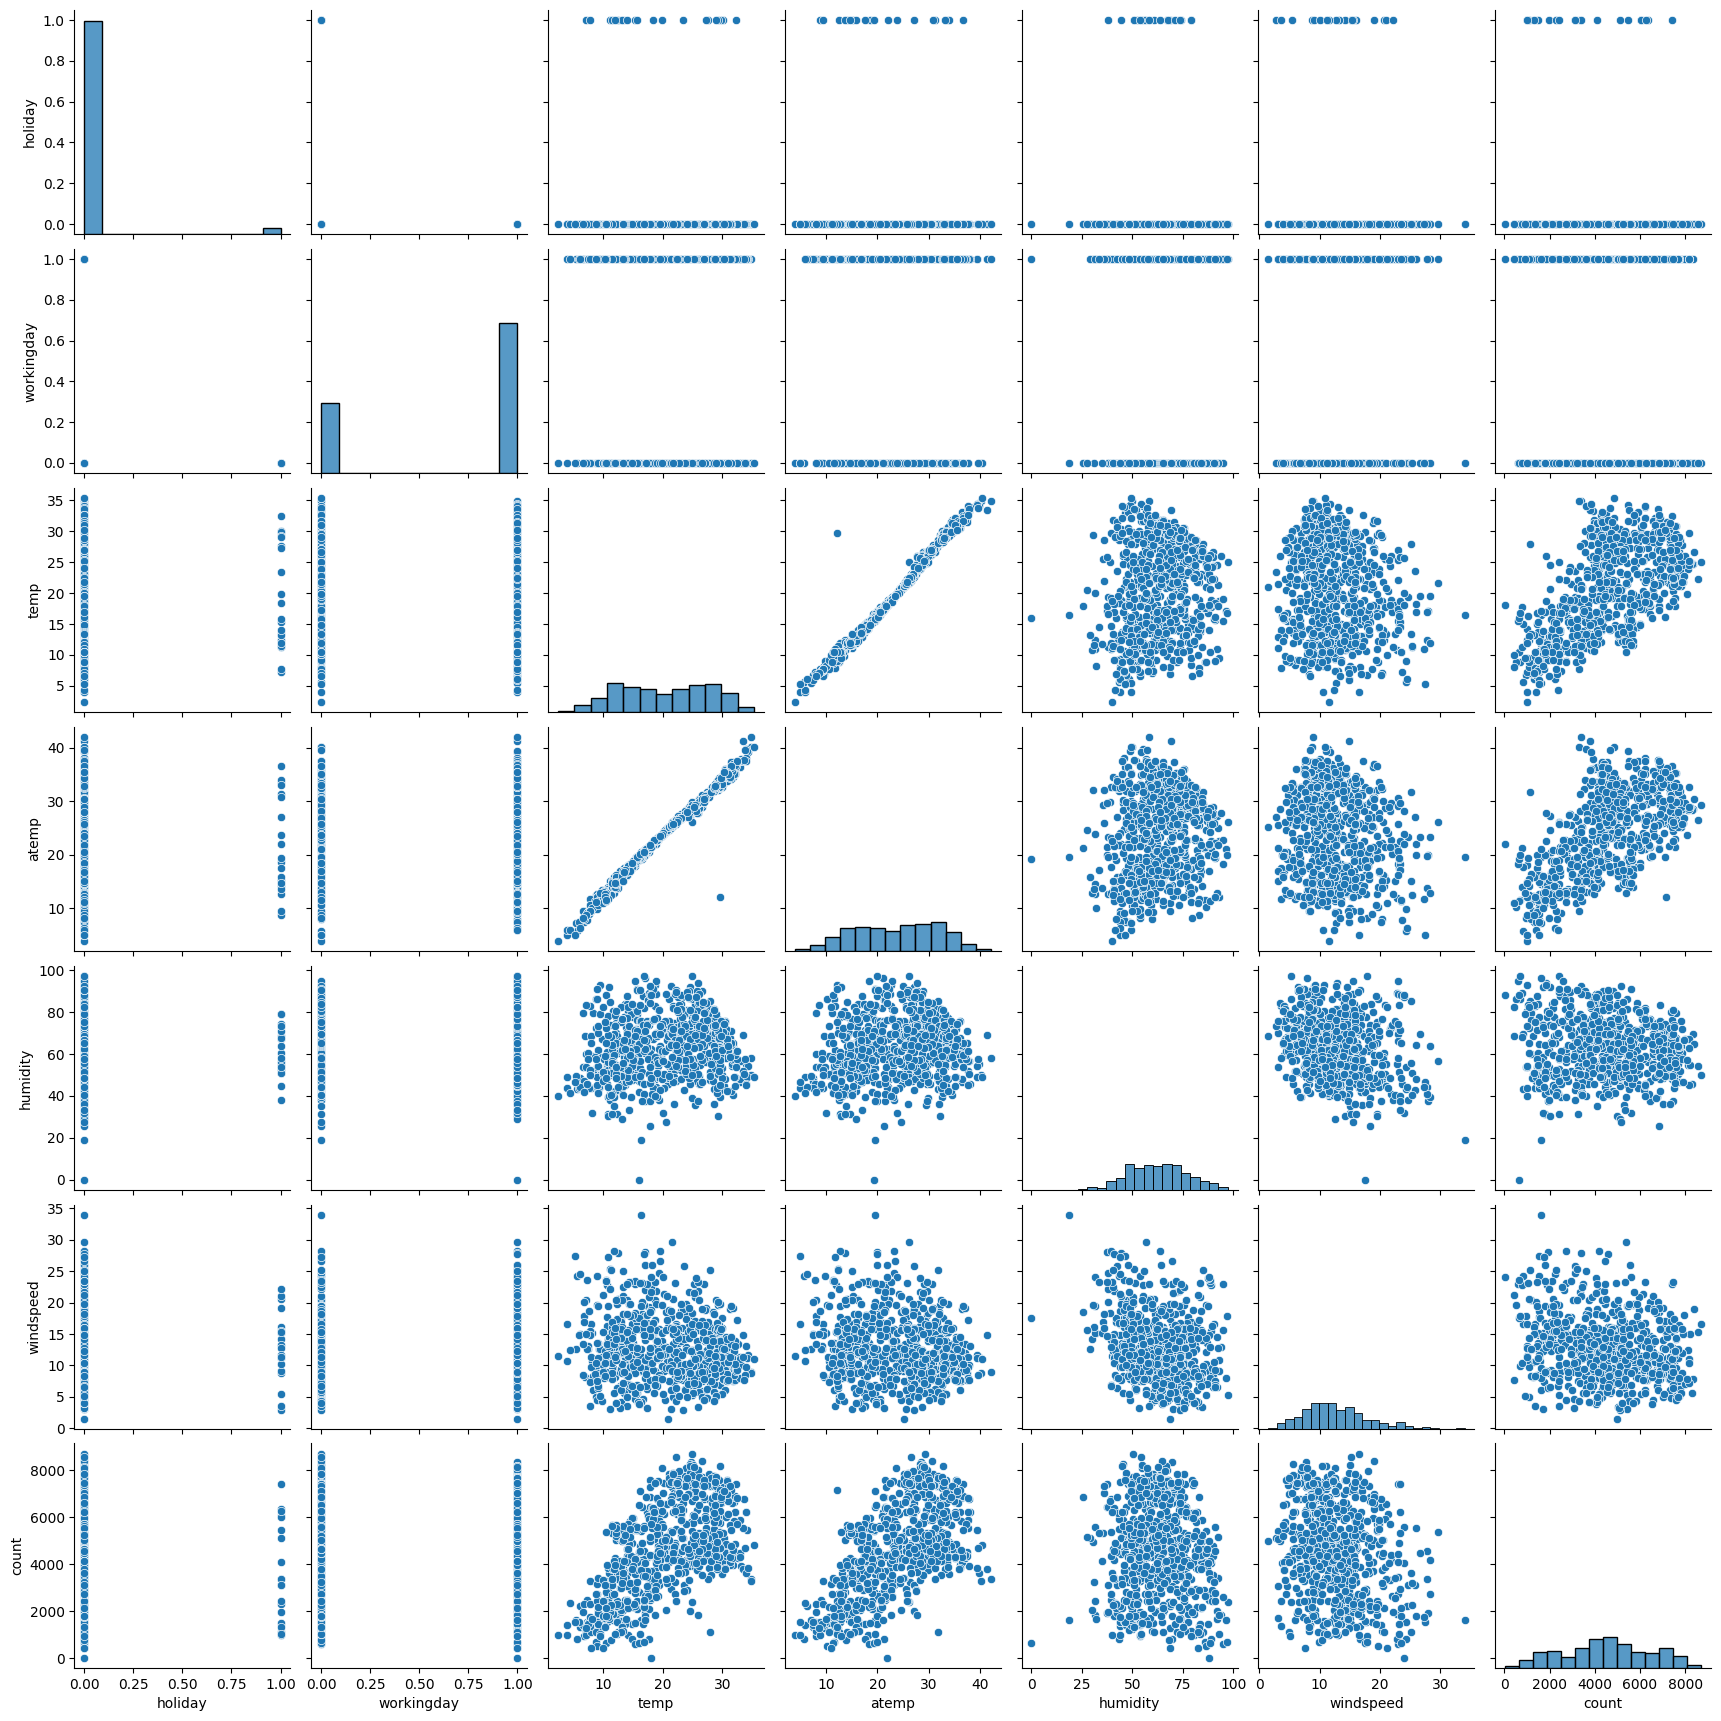

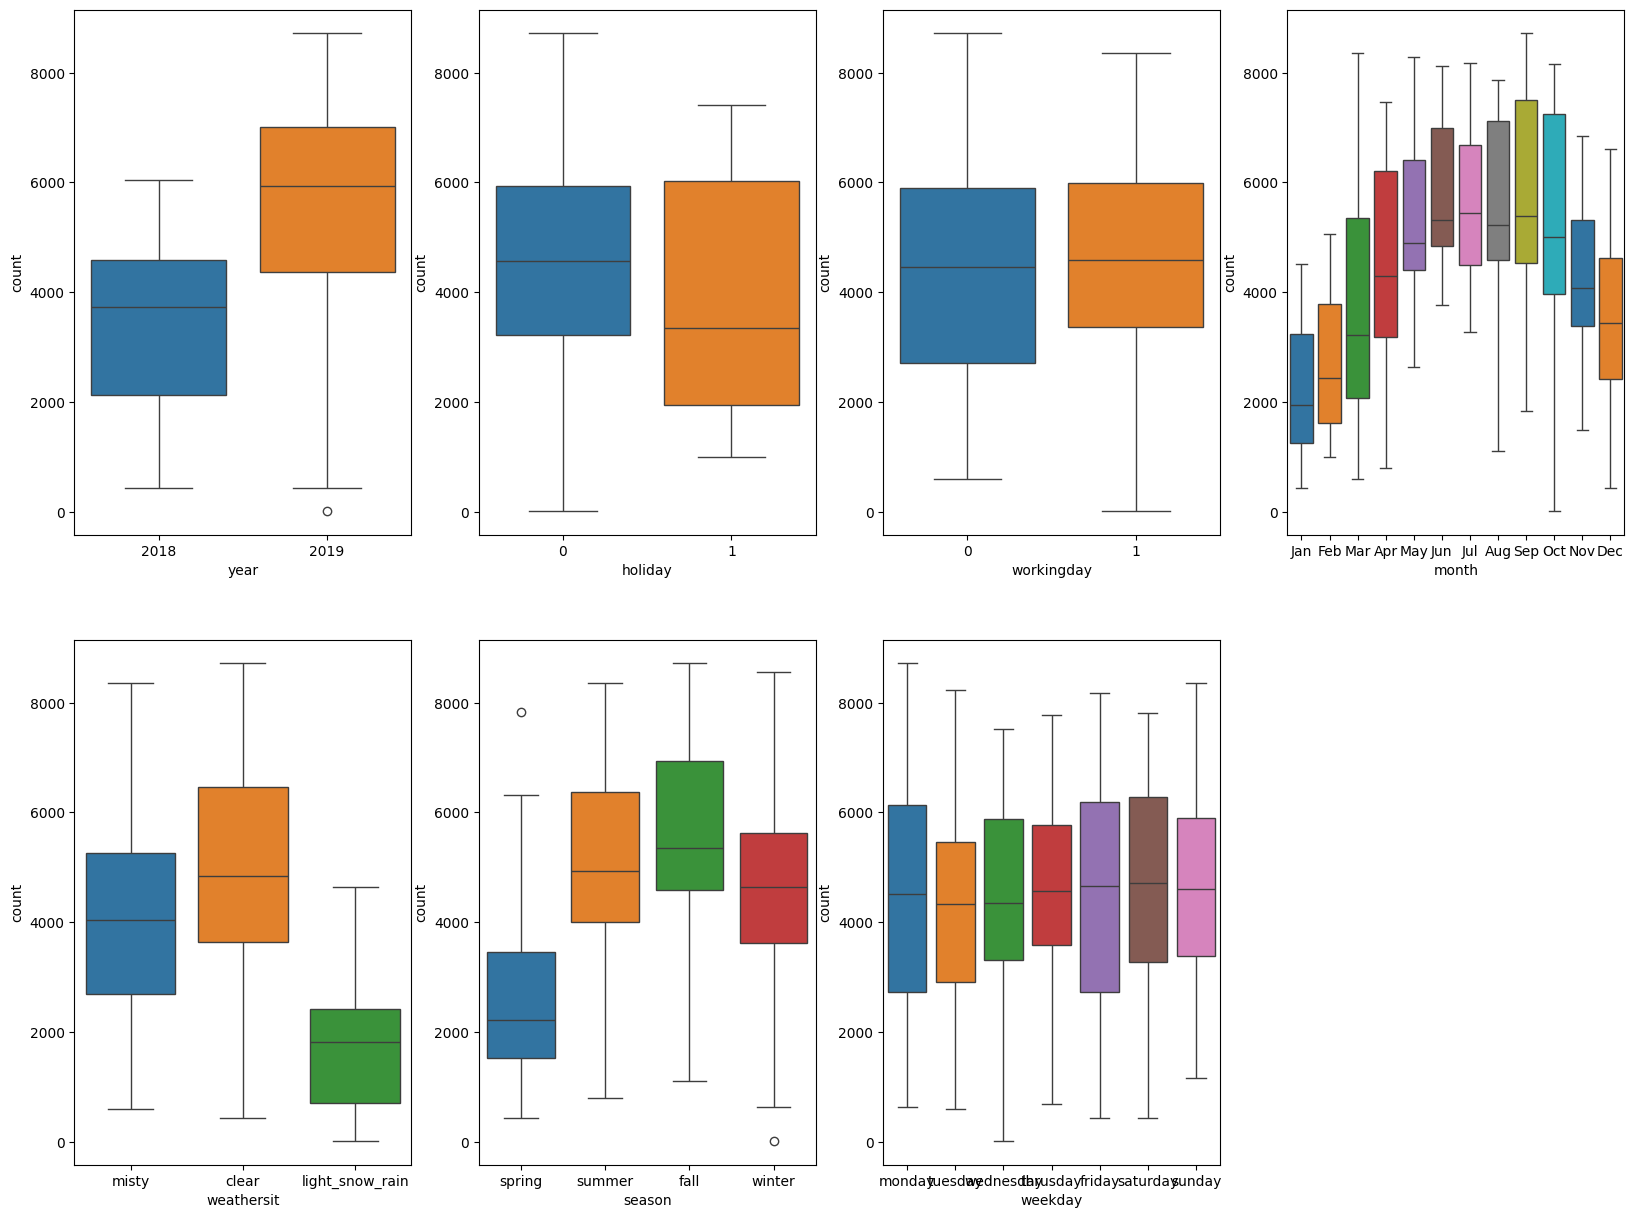

In [95]:
# Bivariate Analysis
plt.figure(figsize=(20, 15))
sns.pairplot(data=df,palette=sns.color_palette())
plt.show()
    
#Boxplot for categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = df,palette=sns.color_palette())
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = df,palette=sns.color_palette())
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = df, palette=sns.color_palette())
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = df,palette=sns.color_palette())
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df,palette=sns.color_palette())
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = df,palette=sns.color_palette())
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = df,palette=sns.color_palette())
plt.show()

In [96]:
### Multivariate Analysis

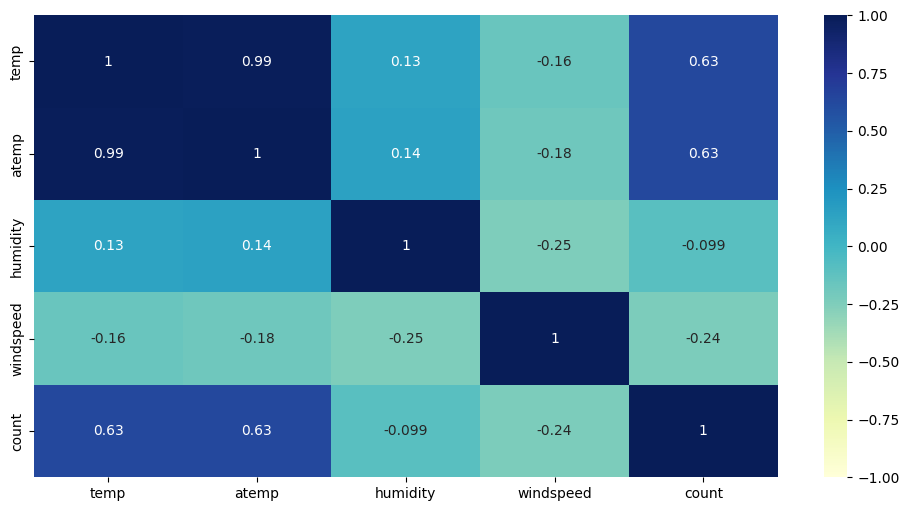

In [97]:

plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True,vmax=1,vmin=-1,cmap="YlGnBu")
plt.show()

### Observations on variables
- temp and atemp are highly correlated and it may create multicolineraity issue. We will drop oner of them.
- dteday will not required to build the model. Thus we will drop them.
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.

### Analysis Summary:-

- By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like temp which shows a positive correlation with the target variable cnt.
- From the "workingday" boxplot we can see those maximum bookings happening between 4000 and 6000, that is the median count of users is constant almost throughout the week. It is almost same for both workday and holiday.
- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more    confident about the predictions of the model.
- There are no users when there is mist or snow, means in the adverse weather people are not renting bikes. Highest count has been seen when the weather situation was Clear or Partly Cloudy.
- For the variable season, we can see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for  spring.
- The year 2019 had a higher count of users as compared to the year 2018.
- The count of rentals is almost even throughout the week.
- The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.
- The count of users is less during the holidays.

## Data Preparation

### Creating Dummy Variables (One Hot Encoding)
We will create dummy variables for our categorical data to create proper model.
The variables mnth,weekday,season,weathersit,have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - **mnth, weekday, season,weathersit,yr,workingday and holiday.**
#### We now need to create dummy variables for the below columns - 
- year
- month
- weekday
- season
- weathersit

In [98]:
#Checking shape and columns
df.shape
df.info()
#All Good Till now
df[cat_cols].nunique()
dummy_data=pd.get_dummies(df[['year','month','weekday','season','weathersit']], dtype=int, drop_first=True)
dummy_data.head()
df=pd.concat([df,dummy_data],axis=1)
#As columns 'season','mnth','weekday','weathersit' are no longer needed for machine learning model , we can drop them
df.drop(['year','month','weekday','season','weathersit'], axis = 1,inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Splitting data for craeting Traing and Test Set

In [99]:
#We will now split the dataset into training and testing datasets having 70% and 30% data respectively
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(df, train_size=0.70 , random_state=100 )
print(df_train.shape, df_test.shape , df.shape)

(510, 30) (220, 30) (730, 30)


In [100]:
df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
576,0,1,29.246653,33.1448,70.4167,11.083475,7216,1,0,0,...,0,0,1,0,0,0,0,0,0,0
426,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,1
728,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,1,...,0,0,0,1,0,1,0,0,0,0
482,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,1,0,0,1
111,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### Scalling
We will MinMaxScaling here as it takes care of the outliers and we saw from boxplot that **windspeed** and **humidity** has outliers.

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
filter_to_scale = num_cols
df_train[filter_to_scale]=scaler.fit_transform(df_train[filter_to_scale])
df_test[filter_to_scale]=scaler.transform(df_test[filter_to_scale])

df_train=pd.DataFrame(df_train,columns=df_train.columns)
df_test=pd.DataFrame(df_test,columns=df_test.columns)

In [102]:
df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.096078,0.084314,...,0.133333,0.127451,0.131373,0.143137,0.150980,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.294988,0.278131,...,0.340268,0.333805,0.338139,0.350557,0.358381,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
#Creating train and test dataset by dropping dependant and independant variables
y_train=df_train["count"]
X_train_df=df_train.drop("count",axis=1)
y_test=df_test["count"]
X_test_df=df_test.drop("count",axis=1)

In [104]:
#As both temp and atemp are highly correlated, dropping atemp to mitigate potential multicolinearity issue
X_train_df=X_train_df.drop(["atemp"],axis=1)
X_test_df=X_test_df.drop(["atemp"],axis=1)

### First Model with all the features

In [105]:
import statsmodels.api as sm

In [106]:
X_train_sm=sm.add_constant(X_train_df)
X_test_sm=sm.add_constant(X_test_df)
model0=sm.OLS(np.array(y_train),X_train_sm)
res0=model0.fit()
res0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.00e-181
Time:                        15:31:41   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2409      0.036      6.786      0.000       0.171       0.311
holiday                        0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                     0.0929      0.012      7.707      0.000       0.069       0.117
temp                           0.4454      0.046      9.628      0.000       0.354       0.536
humidity                      -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
year_2019                      0.2324      0.008     28.819      0.000       0.217       0.248
month_Aug                      0.0204      0.034      0.607      0.544      -0.046       0.086
month_Dec                     -0.0443      0.034     -1.317      0.189      -0.110       0.022
month_Feb                     -0.0324      0.033     -0.985      0.325      -0.097       0.032
month_Jan                     -0.0633      0.034     -1.885      0.060      -0.129       0.003
month_Jul                     -0.0338      0.035     -0.969      0.333      -0.102       0.035
month_Jun                      0.0046      0.025      0.186      0.853      -0.044       0.053
month_Mar                      0.0013      0.025      0.052      0.959      -0.047       0.050
month_May                      0.0247      0.021      1.173      0.241      -0.017       0.066
month_Nov                     -0.0399      0.036     -1.096      0.274      -0.111       0.032
month_Oct                      0.0075      0.036      0.210      0.834      -0.063       0.078
month_Sep                      0.0859      0.032      2.692      0.007       0.023       0.149
weekday_monday                 0.0978      0.014      7.231      0.000       0.071       0.124
weekday_saturday              -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_sunday                 0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_thrusday              -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_tuesday                0.0435      0.014      3.173      0.002       0.017       0.070
weekday_wednesday             -0.0154      0.015     -1.057      0.291      -0.044       0.013
season_spring                 -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer                  0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter                  0.1076      0.028      3.853      0.000       0.053       0.163
weathersit_light_snow_rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_misty              -0.0596      0.010     -5.709      0.000      -0.080      -0.039
===========================================

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
1,holiday,inf
2,workingday,inf
18,weekday_monday,inf
22,weekday_tuesday,inf
24,season_spring,10.747592
26,season_winter,9.441343
25,season_summer,8.265165
3,temp,7.084168
15,month_Nov,6.788097
16,month_Oct,6.466548


### In the first model with all the features, we can see high devialtion between r2 and adj-r2 values.
### Also we got very high p-values and VIFs on many feartures which we need not require.
### Thus we will use RFE to selct feature

### Features Selection and Building Model using RFE

**Approach i will follow:**
We will use a mixed approach to build the model.
Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model
### Feature Selection
**We start with 20 variables.**
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [108]:
#Importing LinearRegression Class
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Using RFE to select 20 indepenmdent features out of 30:

In [161]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=20)
selector=selector.fit(X_train_df,y_train)
print(selector.support_)
selected_features=X_train_df.columns[selector.support_]
print(selected_features)
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

[ True  True  True  True  True  True False  True  True  True  True False
 False  True  True False  True  True False False False  True False  True
  True  True  True  True]
Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year_2019',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_May',
       'month_Nov', 'month_Sep', 'weekday_monday', 'weekday_tuesday',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_light_snow_rain', 'weathersit_misty'],
      dtype='object')


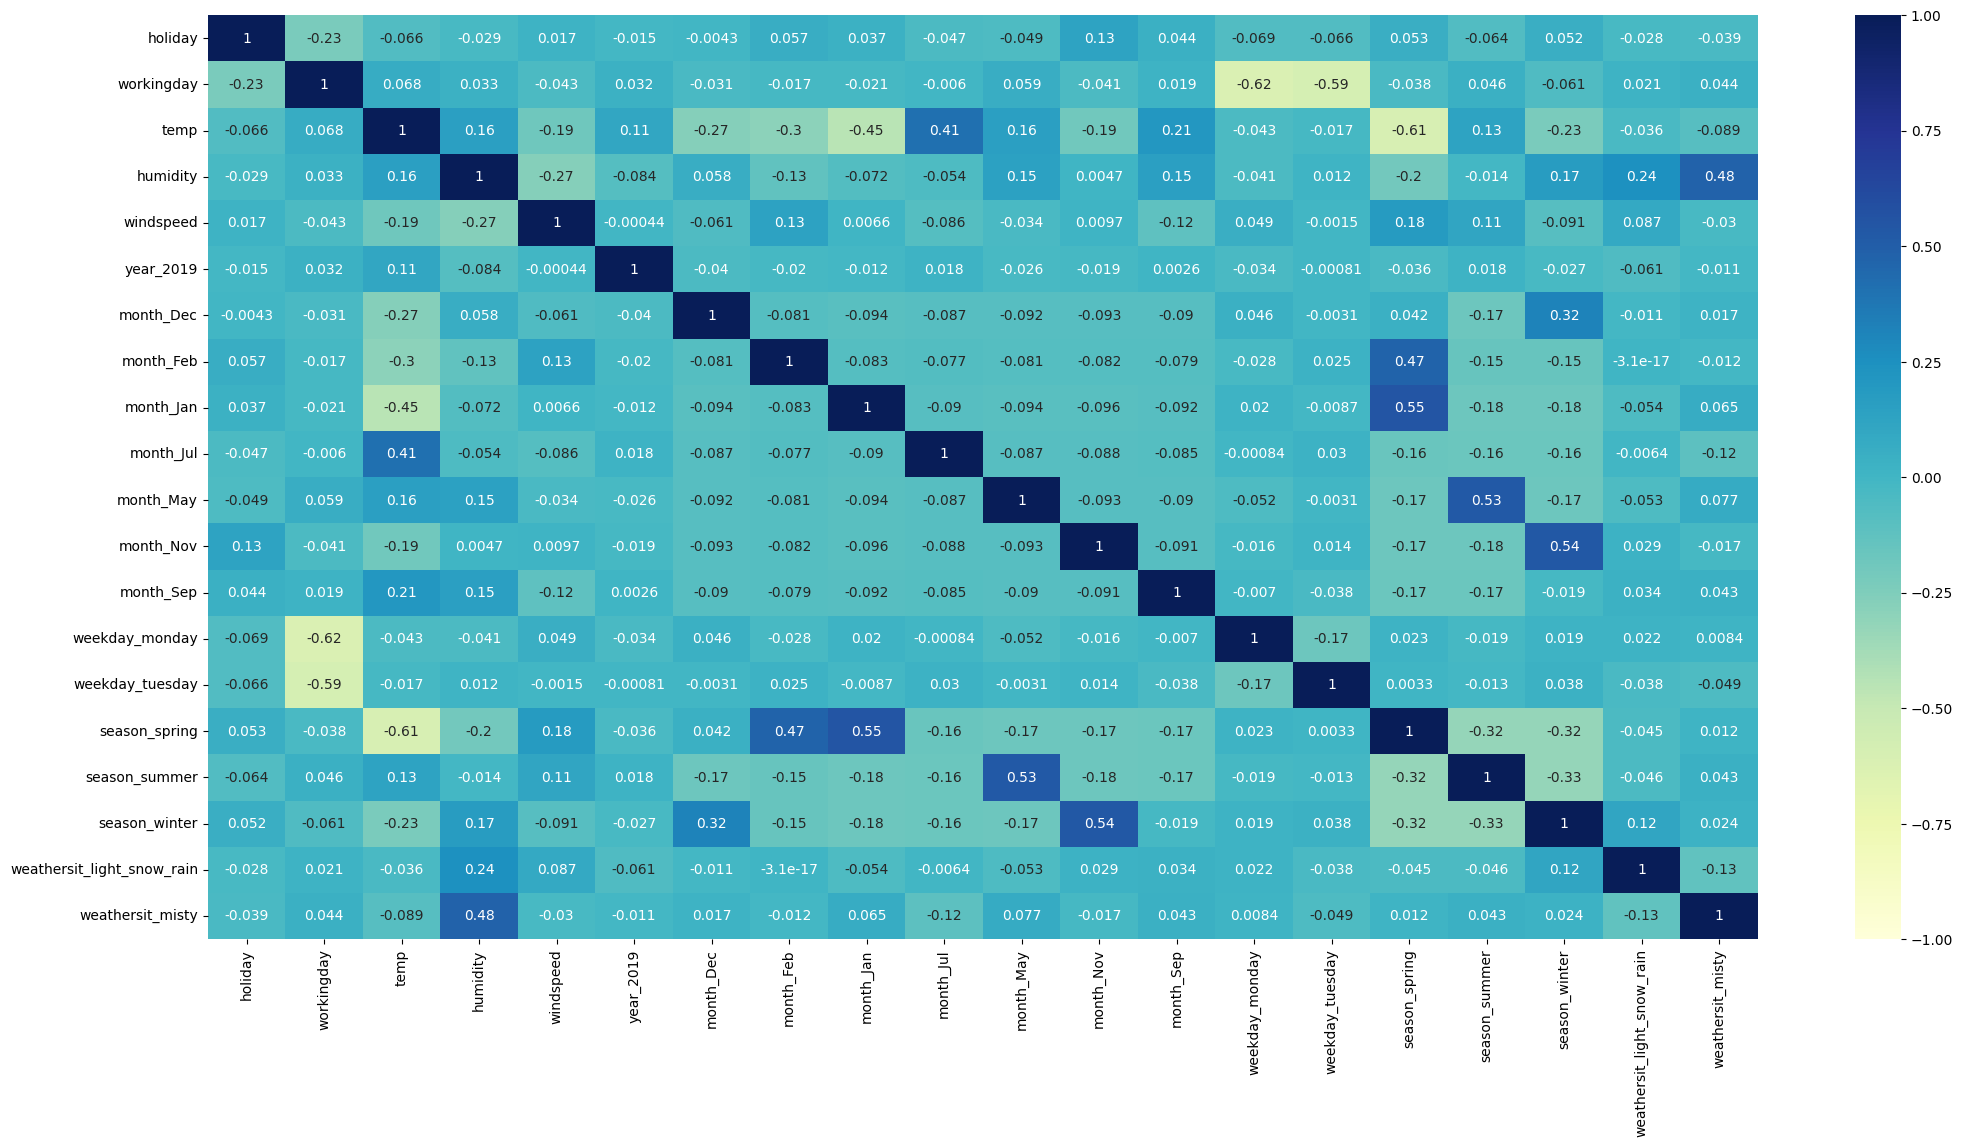

In [162]:
#Heatmap to see the correlations
plt.figure(figsize = (25, 12))  
sns.heatmap(X_train.corr(), annot = True,vmin=-1,vmax=1,cmap="YlGnBu")
plt.show()

### Model Creation

In [163]:
#Importing Statsmodels
import statsmodels.api as sm

In [164]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()
#holiday,season_summer,month_Feb,month_May have high p-value, > 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.20e-189
Time:                        15:36:10   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2475      0.030      8.194      0.000       0.188       0.307
holiday                        0.0003      0.022      0.016      0.987      -0.042       0.043
workingday                     0.0936      0.010      9.443      0.000       0.074       0.113
temp                           0.4527      0.038     11.846      0.000       0.378       0.528
humidity                      -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
year_2019                      0.2318      0.008     29.103      0.000       0.216       0.247
month_Dec                     -0.0488      0.018     -2.692      0.007      -0.084      -0.013
month_Feb                     -0.0348      0.021     -1.626      0.105      -0.077       0.007
month_Jan                     -0.0650      0.021     -3.067      0.002      -0.107      -0.023
month_Jul                     -0.0510      0.018     -2.844      0.005      -0.086      -0.016
month_May                      0.0229      0.017      1.325      0.186      -0.011       0.057
month_Nov                     -0.0461      0.019     -2.456      0.014      -0.083      -0.009
month_Sep                      0.0723      0.017      4.349      0.000       0.040       0.105
weekday_monday                 0.1040      0.012      8.744      0.000       0.081       0.127
weekday_tuesday                0.0495      0.012      4.002      0.000       0.025       0.074
season_spring                 -0.0553      0.022     -2.528      0.012      -0.098      -0.012
season_summer                  0.0295      0.017      1.747      0.081      -0.004       0.063
season_winter                  0.1001      0.018      5.618      0.000       0.065       0.135
weathersit_light_snow_rain    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
weathersit_misty              -0.0583      0.010     -5.655      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                     1.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [165]:
#Checking for Outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)
#season_spring has VIF > 5

,Feature,VIF
1,holiday,inf
2,workingday,inf
15,weekday_tuesday,inf
14,weekday_monday,inf
16,season_spring,5.786996
3,temp,4.882796
18,season_winter,3.876310
17,season_summer,3.487247
9,month_Jan,2.376854
4,humidity,1.967977


### We will drop first holiday feature for high p-value in our next model.

### Model2

In [166]:
#We will remove feature one by one which we got from last OLS p-value
X_train_sm=X_train_sm.drop("holiday",axis=1)
X_test_sm=X_test_sm.drop("holiday",axis=1)

In [167]:
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()
#month_Feb,month_May,weekday_tuesday and season_summer have high p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.20e-189
Time:                        15:36:44   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2478      0.045      5.472      0.000       0.159       0.337
workingday                     0.0933      0.025      3.679      0.000       0.043       0.143
temp                           0.4527      0.038     11.846      0.000       0.378       0.528
humidity                      -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
year_2019                      0.2318      0.008     29.103      0.000       0.216       0.247
month_Dec                     -0.0488      0.018     -2.692      0.007      -0.084      -0.013
month_Feb                     -0.0348      0.021     -1.626      0.105      -0.077       0.007
month_Jan                     -0.0650      0.021     -3.067      0.002      -0.107      -0.023
month_Jul                     -0.0510      0.018     -2.844      0.005      -0.086      -0.016
month_May                      0.0229      0.017      1.325      0.186      -0.011       0.057
month_Nov                     -0.0461      0.019     -2.456      0.014      -0.083      -0.009
month_Sep                      0.0723      0.017      4.349      0.000       0.040       0.105
weekday_monday                 0.1036      0.027      3.864      0.000       0.051       0.156
weekday_tuesday                0.0492      0.027      1.827      0.068      -0.004       0.102
season_spring                 -0.0553      0.022     -2.528      0.012      -0.098      -0.012
season_summer                  0.0295      0.017      1.747      0.081      -0.004       0.063
season_winter                  0.1001      0.018      5.618      0.000       0.065       0.135
weathersit_light_snow_rain    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
weathersit_misty              -0.0583      0.010     -5.655      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

#season_spring,workingday,weekday_monday,weekday_tuesday have high VIF > 5

,Feature,VIF
0,const,134.741201
1,workingday,9.242673
13,weekday_monday,6.184397
14,weekday_tuesday,5.839272
15,season_spring,5.786996
2,temp,4.882796
17,season_winter,3.876310
16,season_summer,3.487247
8,month_Jan,2.376854
3,humidity,1.967977


In [117]:
### weekday_tuesday has both high p-value and VIF

### Model3

In [169]:
X_train_sm = X_train_sm.drop("weekday_tuesday",axis=1)
X_test_sm = X_test_sm.drop("weekday_tuesday",axis=1)

In [170]:
model3=sm.OLS(np.array(y_train),X_train_sm)
res3=model3.fit()
res3.summary()
#month_Feb,month_May and season_summer have high p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.15e-189
Time:                        15:37:46   Log-Likelihood:                 523.66
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     491   BIC:                            -928.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2918      0.038      7.590      0.000       0.216       0.367
workingday                     0.0513      0.011      4.766      0.000       0.030       0.072
temp                           0.4496      0.038     11.750      0.000       0.374       0.525
humidity                      -0.1525      0.038     -4.051      0.000      -0.226      -0.079
windspeed                     -0.1877      0.025     -7.369      0.000      -0.238      -0.138
year_2019                      0.2320      0.008     29.069      0.000       0.216       0.248
month_Dec                     -0.0503      0.018     -2.771      0.006      -0.086      -0.015
month_Feb                     -0.0367      0.021     -1.715      0.087      -0.079       0.005
month_Jan                     -0.0670      0.021     -3.157      0.002      -0.109      -0.025
month_Jul                     -0.0500      0.018     -2.783      0.006      -0.085      -0.015
month_May                      0.0236      0.017      1.362      0.174      -0.010       0.058
month_Nov                     -0.0504      0.019     -2.700      0.007      -0.087      -0.014
month_Sep                      0.0700      0.017      4.213      0.000       0.037       0.103
weekday_monday                 0.0617      0.014      4.438      0.000       0.034       0.089
season_spring                 -0.0565      0.022     -2.577      0.010      -0.100      -0.013
season_summer                  0.0288      0.017      1.699      0.090      -0.004       0.062
season_winter                  0.1000      0.018      5.599      0.000       0.065       0.135
weathersit_light_snow_rain    -0.2547      0.026     -9.740      0.000      -0.306      -0.203
weathersit_misty              -0.0582      0.010     -5.629      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       89.466   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.321
Skew:                          -0.832   Prob(JB):                     6.62e-58
Kurtosis:                       6.102   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)
#season_spring has high VIF

,Feature,VIF
0,const,96.646460
14,season_spring,5.781944
2,temp,4.873621
16,season_winter,3.876273
15,season_summer,3.485237
8,month_Jan,2.370724
3,humidity,1.967271
7,month_Feb,1.863432
11,month_Nov,1.793098
6,month_Dec,1.659893


### Model 4

In [172]:
X_train_sm = X_train_sm.drop("month_May",axis=1)
X_test_sm = X_test_sm.drop("month_May",axis=1)

In [173]:
model4=sm.OLS(np.array(y_train),X_train_sm)
res4=model4.fit()
res4.summary()
#month_Feb has high p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.15e-190
Time:                        15:38:39   Log-Likelihood:                 522.70
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -933.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2812      0.038      7.462      0.000       0.207       0.355
workingday                     0.0516      0.011      4.786      0.000       0.030       0.073
temp                           0.4588      0.038     12.167      0.000       0.385       0.533
humidity                      -0.1461      0.037     -3.908      0.000      -0.220      -0.073
windspeed                     -0.1894      0.025     -7.441      0.000      -0.239      -0.139
year_2019                      0.2314      0.008     29.013      0.000       0.216       0.247
month_Dec                     -0.0489      0.018     -2.697      0.007      -0.084      -0.013
month_Feb                     -0.0353      0.021     -1.650      0.100      -0.077       0.007
month_Jan                     -0.0653      0.021     -3.080      0.002      -0.107      -0.024
month_Jul                     -0.0505      0.018     -2.806      0.005      -0.086      -0.015
month_Nov                     -0.0487      0.019     -2.616      0.009      -0.085      -0.012
month_Sep                      0.0700      0.017      4.207      0.000       0.037       0.103
weekday_monday                 0.0614      0.014      4.412      0.000       0.034       0.089
season_spring                 -0.0526      0.022     -2.417      0.016      -0.095      -0.010
season_summer                  0.0389      0.015      2.550      0.011       0.009       0.069
season_winter                  0.1021      0.018      5.736      0.000       0.067       0.137
weathersit_light_snow_rain    -0.2565      0.026     -9.817      0.000      -0.308      -0.205
weathersit_misty              -0.0584      0.010     -5.641      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       87.068   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.133
Skew:                          -0.829   Prob(JB):                     2.64e-53
Kurtosis:                       5.941   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)
#season_spring has high VIF

,Feature,VIF
0,const,92.664276
13,season_spring,5.683099
2,temp,4.723835
15,season_winter,3.846544
14,season_summer,2.818235
8,month_Jan,2.362658
3,humidity,1.937049
7,month_Feb,1.859192
10,month_Nov,1.785684
1,workingday,1.658096


In [124]:
### Model 5

In [175]:
X_train_sm = X_train_sm.drop("month_Feb",axis=1)
X_test_sm = X_test_sm.drop("month_Feb",axis=1)

In [178]:
model5=sm.OLS(np.array(y_train),X_train_sm)
res5=model5.fit()
res5.summary()
#All P-values are good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.20e-190
Time:                        15:41:00   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2690      0.037      7.267      0.000       0.196       0.342
workingday                     0.0521      0.011      4.826      0.000       0.031       0.073
temp                           0.4744      0.037     12.978      0.000       0.403       0.546
humidity                      -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed                     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
year_2019                      0.2311      0.008     28.929      0.000       0.215       0.247
month_Dec                     -0.0398      0.017     -2.302      0.022      -0.074      -0.006
month_Jan                     -0.0465      0.018     -2.596      0.010      -0.082      -0.011
month_Jul                     -0.0514      0.018     -2.854      0.004      -0.087      -0.016
month_Nov                     -0.0441      0.018     -2.390      0.017      -0.080      -0.008
month_Sep                      0.0714      0.017      4.289      0.000       0.039       0.104
weekday_monday                 0.0625      0.014      4.493      0.000       0.035       0.090
season_spring                 -0.0624      0.021     -2.974      0.003      -0.104      -0.021
season_summer                  0.0421      0.015      2.783      0.006       0.012       0.072
season_winter                  0.1038      0.018      5.832      0.000       0.069       0.139
weathersit_light_snow_rain    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
weathersit_misty              -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)
#season_spring has high VIF

,Feature,VIF
0,const,89.132872
12,season_spring,5.262117
2,temp,4.424815
14,season_winter,3.833465
13,season_summer,2.770844
3,humidity,1.935362
9,month_Nov,1.745232
7,month_Jan,1.677718
1,workingday,1.656762
11,weekday_monday,1.649253


In [128]:
### Model 6

In [180]:
X_train_sm = X_train_sm.drop("season_spring",axis=1)
X_test_sm = X_test_sm.drop("season_spring",axis=1)

In [181]:
model6=sm.OLS(np.array(y_train),X_train_sm)
res6=model6.fit()
res6.summary()
#month_Nov and month_Dec with hogh p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          6.82e-190
Time:                        15:42:33   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2037      0.030      6.784      0.000       0.145       0.263
workingday                     0.0528      0.011      4.857      0.000       0.031       0.074
temp                           0.5492      0.027     20.533      0.000       0.497       0.602
humidity                      -0.1600      0.038     -4.265      0.000      -0.234      -0.086
windspeed                     -0.1969      0.026     -7.713      0.000      -0.247      -0.147
year_2019                      0.2297      0.008     28.578      0.000       0.214       0.245
month_Dec                     -0.0338      0.017     -1.952      0.051      -0.068       0.000
month_Jan                     -0.0504      0.018     -2.801      0.005      -0.086      -0.015
month_Jul                     -0.0411      0.018     -2.308      0.021      -0.076      -0.006
month_Nov                     -0.0343      0.018     -1.877      0.061      -0.070       0.002
month_Sep                      0.0864      0.016      5.402      0.000       0.055       0.118
weekday_monday                 0.0632      0.014      4.509      0.000       0.036       0.091
season_summer                  0.0733      0.011      6.665      0.000       0.052       0.095
season_winter                  0.1395      0.013     10.524      0.000       0.113       0.166
weathersit_light_snow_rain    -0.2488      0.026     -9.468      0.000      -0.300      -0.197
weathersit_misty              -0.0552      0.010     -5.307      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       73.135   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.330
Skew:                          -0.749   Prob(JB):                     1.40e-38
Kurtosis:                       5.442   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)
#VIF ia okay

,Feature,VIF
0,const,57.712082
2,temp,2.331577
13,season_winter,2.091971
3,humidity,1.912778
9,month_Nov,1.689934
7,month_Jan,1.668536
1,workingday,1.655894
11,weekday_monday,1.648769
15,weathersit_misty,1.563992
6,month_Dec,1.482989


In [132]:
### Model 7

In [183]:
X_train_sm = X_train_sm.drop("month_Nov",axis=1)
X_test_sm = X_test_sm.drop("month_Nov",axis=1)

In [184]:
model7=sm.OLS(np.array(y_train),X_train_sm)
res7=model7.fit()
res7.summary()
#month_Dec has high p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.76e-190
Time:                        15:43:53   Log-Likelihood:                 514.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     495   BIC:                            -936.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1959      0.030      6.571      0.000       0.137       0.254
workingday                     0.0531      0.011      4.876      0.000       0.032       0.075
temp                           0.5582      0.026     21.164      0.000       0.506       0.610
humidity                      -0.1592      0.038     -4.233      0.000      -0.233      -0.085
windspeed                     -0.1969      0.026     -7.695      0.000      -0.247      -0.147
year_2019                      0.2297      0.008     28.507      0.000       0.214       0.246
month_Dec                     -0.0214      0.016     -1.332      0.183      -0.053       0.010
month_Jan                     -0.0456      0.018     -2.553      0.011      -0.081      -0.011
month_Jul                     -0.0421      0.018     -2.358      0.019      -0.077      -0.007
month_Sep                      0.0894      0.016      5.604      0.000       0.058       0.121
weekday_monday                 0.0640      0.014      4.551      0.000       0.036       0.092
season_summer                  0.0747      0.011      6.790      0.000       0.053       0.096
season_winter                  0.1268      0.011     11.089      0.000       0.104       0.149
weathersit_light_snow_rain    -0.2457      0.026     -9.344      0.000      -0.297      -0.194
weathersit_misty              -0.0547      0.010     -5.246      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       70.968   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.157
Skew:                          -0.732   Prob(JB):                     5.04e-37
Kurtosis:                       5.392   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)
#VIF all good

,Feature,VIF
0,const,56.609791
2,temp,2.255917
3,humidity,1.912543
1,workingday,1.655454
10,weekday_monday,1.647532
7,month_Jan,1.634638
14,weathersit_misty,1.562901
12,season_winter,1.549988
8,month_Jul,1.434144
11,season_summer,1.433950


In [136]:
#from sklearn.model_selection import cross_val_score
#validation_scores = cross_val_score(estimator, X_train_sm, y_train, cv=10, scoring='neg_mean_squared_error')
#print(f"Mean MSE: {-np.mean(validation_scores)}")
#Mean MSE: 0.00830152783824031

Mean MSE: 0.008208539375550656


In [138]:
###Model 8

In [186]:
X_train_sm = X_train_sm.drop("month_Dec",axis=1)
X_test_sm = X_test_sm.drop("month_Dec",axis=1)

In [187]:
model8=sm.OLS(np.array(y_train),X_train_sm)
res8=model8.fit()
res8.summary()
#All p-values are good now

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.53e-191
Time:                        15:45:51   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1907      0.030      6.447      0.000       0.133       0.249
workingday                     0.0526      0.011      4.824      0.000       0.031       0.074
temp                           0.5684      0.025     22.506      0.000       0.519       0.618
humidity                      -0.1643      0.037     -4.387      0.000      -0.238      -0.091
windspeed                     -0.1943      0.026     -7.609      0.000      -0.244      -0.144
year_2019                      0.2296      0.008     28.473      0.000       0.214       0.245
month_Jan                     -0.0401      0.017     -2.306      0.022      -0.074      -0.006
month_Jul                     -0.0429      0.018     -2.402      0.017      -0.078      -0.008
month_Sep                      0.0909      0.016      5.715      0.000       0.060       0.122
weekday_monday                 0.0629      0.014      4.476      0.000       0.035       0.090
season_summer                  0.0765      0.011      6.997      0.000       0.055       0.098
season_winter                  0.1251      0.011     11.000      0.000       0.103       0.147
weathersit_light_snow_rain    -0.2425      0.026     -9.253      0.000      -0.294      -0.191
weathersit_misty              -0.0538      0.010     -5.172      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       67.331   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.535
Skew:                          -0.705   Prob(JB):                     2.77e-34
Kurtosis:                       5.298   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)
#All VIFs are good as well

,Feature,VIF
0,const,55.654312
2,temp,2.065398
3,humidity,1.892915
1,workingday,1.653008
9,weekday_monday,1.641718
13,weathersit_misty,1.557302
6,month_Jan,1.547012
11,season_winter,1.529622
7,month_Jul,1.432560
10,season_summer,1.412937


### Cross-Validation for Model Evaluation and error metrics

In [189]:
from sklearn.model_selection import cross_val_score
validation_scores = cross_val_score(estimator, X_train_sm, y_train, cv=10, scoring='neg_mean_squared_error')
print(f"Mean MSE: {-np.mean(validation_scores)}")
#Mean MSE: 0.0082781691285243

Mean MSE: 0.0082781691285243


### Calculating R2 for Train and Test

In [191]:
y_train_pred=res8.predict(X_train_sm)
y_test_pred=res8.predict(X_test_sm)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))
#Train: 0.845 Test: 0.805

Train: 0.845 Test: 0.805


### As all VIF values are under 5 and no p value is greater than 0.05. We can cosider the above model as the best possible model, as it seems to have a very low multicolinearity(VIF) between the predictors and the p-values for all the predictors seems to be significant.
### This looks like a very acceptable model and we can consider this Model 8 (res8) as the base model . Let's perform 10-fold cross-validation to evaluate the performance of the model. But we will go further to reduce least significant features to get best model

In [143]:
### Model 9

In [144]:
#X_train_sm = X_train_sm.drop("month_Jul",axis=1)
#X_test_sm = X_test_sm.drop("month_Jul",axis=1)

In [145]:
#model9=sm.OLS(np.array(y_train),X_train_sm)
#res9=model9.fit()
#res9.summary()

In [146]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif_data=pd.DataFrame()
#vif_data["Feature"]=X_train_sm.columns

#vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
 #                for i in range(len(X_train_sm.columns))]
#if_data.sort_values(by='VIF',ascending=False)

In [147]:
#from sklearn.model_selection import cross_val_score
#validation_scores = cross_val_score(estimator, X_train_sm, y_train, cv=10, scoring='neg_mean_squared_error')
#print(f"Mean MSE: {-np.mean(validation_scores)}")

### Till Now we have seen 9 models but Model 8 has the best fit. Thus we will go with that

#### The 10-fold cross-validation on Model8 is showing a mean MSE of 0.0083. This indicates consistent and strong predictive performance of the model across different data subsets.

#### Now we will do the error analysis or residual analysis

### Error Term Analysis
#### This is important because error terms must have Normal distribution else linaer regression model won't work

In [192]:
#Predicting the Y_train value(Count) using the model
y_train_pred = res8.predict(X_train_sm)
y_train_pred.head()

576    0.722741
426    0.526035
728    0.348979
482    0.611231
111    0.264984
dtype: float64

In [193]:
# 2.Calculating Residual value
error = y_train - y_train_pred
error.head()

576    0.104917
426   -0.060779
728   -0.144883
482   -0.128258
111   -0.073889
dtype: float64

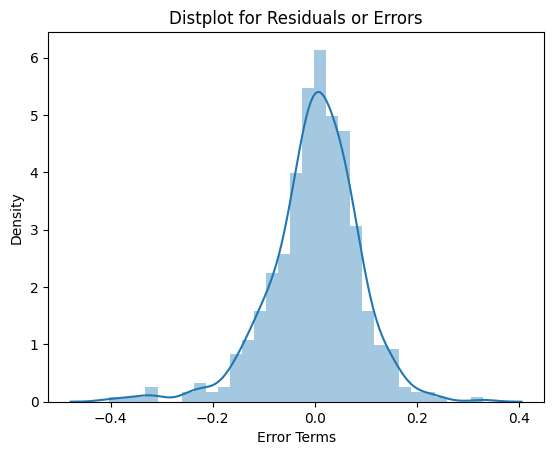

In [150]:
# 3.Visualising the residual value to check if the model not failing any conditions
sns.distplot(error)
plt.xlabel('Error Terms' )
plt.title('Distplot for Residuals or Errors')                 
plt.show()

### Observations :
    1. The distributions errors suggests that the linear regression model fits the data well. The errors being normally distributed and centered around zero are indicators of a good fit.
    2. The errors are randomly distributed, which is desired and from the symmetry we can say no bias is not there.
    3. The symmetric spread of the errors implies that the assumption of homoscedasticity holds, meaning the model's predictions have constant variance across different levels of the input variables.

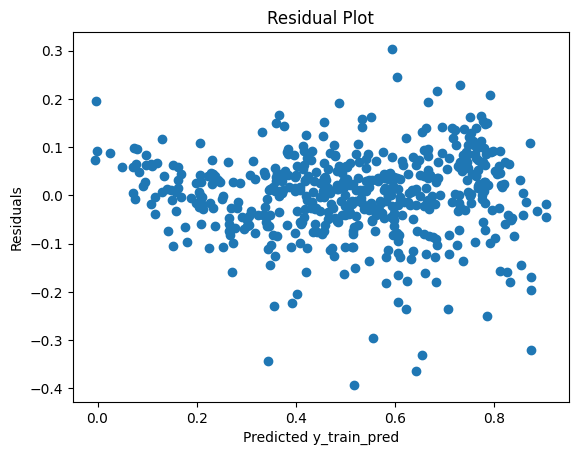

In [194]:
#Scatter Plot to see the distribution
plt.scatter(y_train_pred, error)
plt.xlabel('Predicted y_train_pred')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Observation:
    1. The error are randomly scattered around the horizontal axis (y=0). This denotes that the model is not biased and is capturing the pattern.
    2. The error terms do not show increasing or decreasing spread across the predicted values, supporting the assumption of homoscedasticity, which is important for the validity of statistical tests in regression.
    3. The lack of patterns also suggests that the error are independent of each other, meeting another assumption of linear regression.

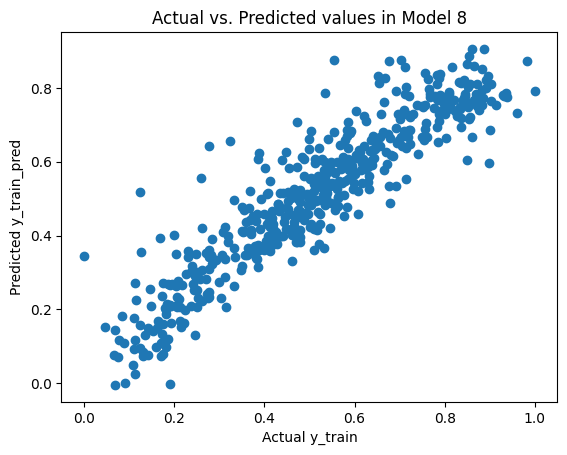

In [195]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train_pred')
plt.title('Actual vs. Predicted values in Model 8')
plt.show()

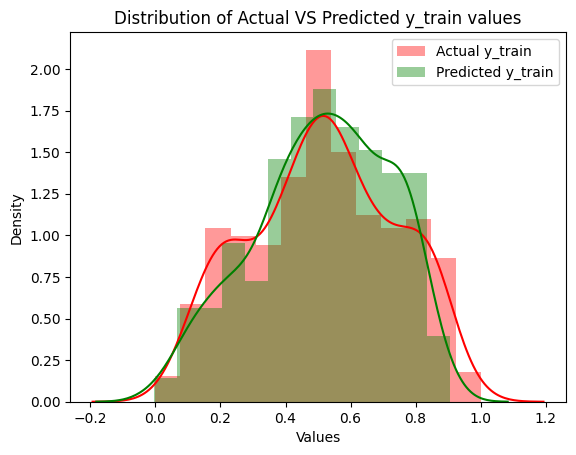

In [196]:
#Comparing distributions of y_train and y_train_pred
sns.distplot(y_train,color='red', label='Actual y_train')
sns.distplot(y_train_pred, color='green', label='Predicted y_train')
plt.xlabel('Values')
plt.legend()
plt.title('Distribution of Actual VS Predicted y_train values')
plt.show()

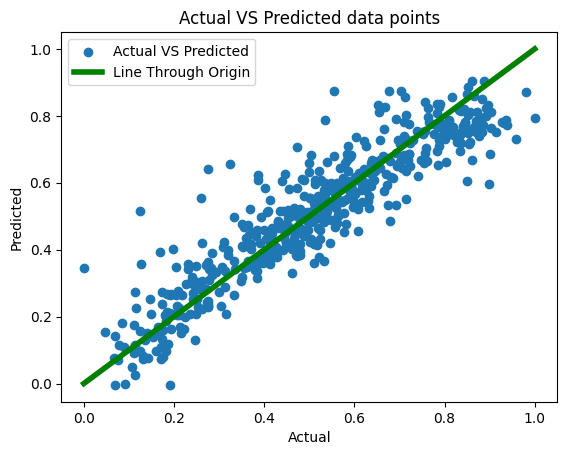

In [197]:
#Plotting actual vs Predicted Data
plt.scatter(y_train, y_train_pred , label='Actual VS Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='green', linestyle='-', linewidth=4, label='Line Through Origin')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted data points')
plt.legend()
plt.show()

### Observation:
 - **The model predicts perfectly, maximum data points lie on the y = x line.**
 - **The model likely captures the underlying patterns in the data well.**
 - **Strong linear relationship is seen.**
 - **Both distributions have peaks around the same value, indicating that the model predicts the most frequent values in the training data accurately.**
 - **The points are closely clustered around this ideal line, which suggests good predictive accuracy.**
 - **Assumptions for Linear Regression**
   - **Linear Relationship: Met**
   - **Homoscedasticity: Met**
   - **Multivariate Normality: Met**

### Final Model Evaluation

In [198]:
#R2 Value for Test and Train Dataset
y_train_pred=res8.predict(X_train_sm)
y_test_pred=res8.predict(X_test_sm)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))
#Train: 0.845 Test: 0.805

Train: 0.845 Test: 0.805


### The R-squared is for train dataset is 84 % and for test it is 81%. Overall, the model demonstrates strong performance and reliability for predicting the target variable in this context.

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error (y_test,y_test_pred)
rmse = np.sqrt (mse)
mae = mean_absolute_error (y_test,y_test_pred)

print (f"MSE: {round(mse,3)}, MAE: {round(mae,3)}, RMSE: {round(rmse,3)}")
#MSE: 0.009, MAE: 0.073, RMSE: 0.097

MSE: 0.009, MAE: 0.073, RMSE: 0.097


### All metrics for Final Model

In [201]:
#Final Model Details
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
# Calculating Adjusted-R^2 value for Train and Test a dataset
y_train_pred=res8.predict(X_train_sm)
y_test_pred=res8.predict(X_test_sm)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train MAE: {round(train_mae,3)}, Test MAE: {round(test_mae,3)}')
print(f'Train RMSE: {round(train_rmse,3)}, Test RMSE: {round(test_rmse,3)}')
print(f'Train R²: {round(r2_train,3)}, Test R²: {round(r2_test,3)}')

#Train MAE: 0.065, Test MAE: 0.073
#Train RMSE: 0.088, Test RMSE: 0.097
#Train R²: 0.845, Test R²: 0.805

Train MAE: 0.065, Test MAE: 0.073
Train RMSE: 0.088, Test RMSE: 0.097
Train R²: 0.845, Test R²: 0.805


### Error metrics are MSE: 0.009, MAE: 0.073, RMSE: 0.096, very near to 0 which is desiarable

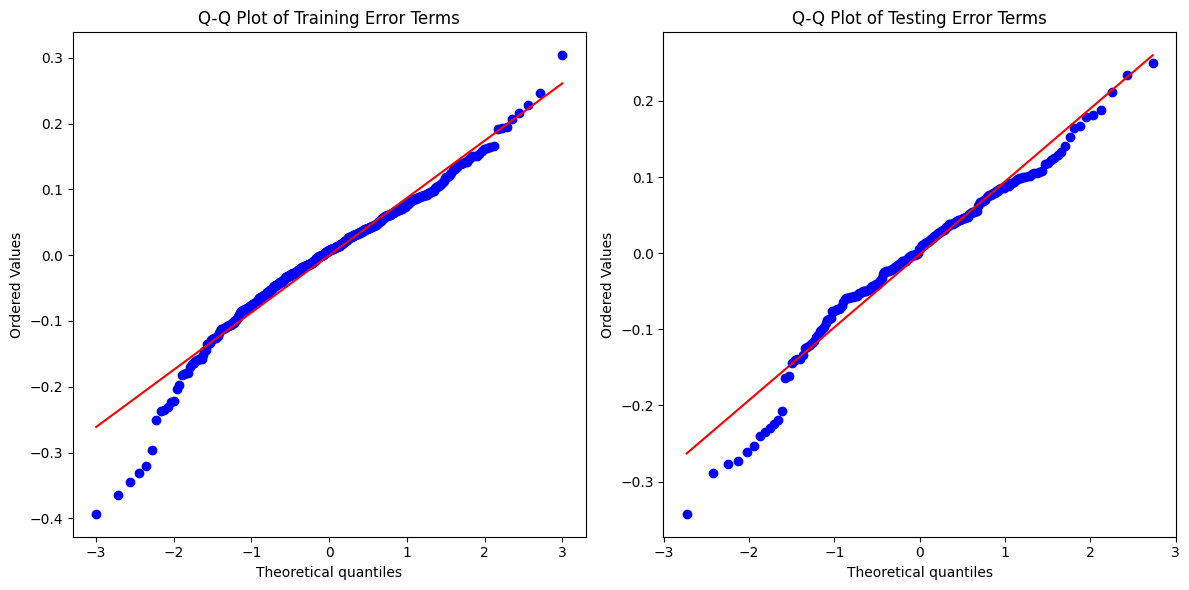

In [202]:
#Q Q plot to see the allinment of the y predict and residual relationship
import scipy.stats as stats
# Create a figure with two subplots
plt.figure(figsize=(12, 6))
# Calculate residuals
train_error = y_train - y_train_pred
test_error = y_test - y_test_pred
plt.subplot(1, 2, 1)
stats.probplot(train_error, dist="norm", plot=plt)
plt.title('Q-Q Plot of Training Error Terms')
# Subplot for testing residuals Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(test_error, dist="norm", plot=plt)
plt.title('Q-Q Plot of Testing Error Terms')
# Show the plot
plt.tight_layout()
plt.show()

### Training and Test metrics comparisons:
 - Train MAE: 0.065, Test MAE: 0.073
 - Train RMSE: 0.088, Test RMSE: 0.097
 - Train R²: 0.845, Test R²: 0.805

### Top features for the model
 - temp coef:0.5684
 - humidity coef:-0.1643
 - windspeed coef:-0.1943
 - year coef:0.2296
 - light snow coef:-0.2425
 - winter coef:0.1251

## Final Equation
 - count (cnt) = 0.1907 + workingday * 0.0526+ temp * 0.5684 - humidity * 0.1643 - windspeed * 0.1943 + year_2019 * 0.2296 - month_Jan * 0.0401 - month_Jul * 0.0429 + month_Sep * 0.0909 + weekday_monday * 0.0629 + season_summer * 0.0765 + season_winter * 0.1251 - weathersit_light_snow_rain * 0.2425 - weathersit_misty * -0.0538


### Final Verdict for Boom Bike

- Temparature Effect:
  - Summer season or warmer months have more count of bike thus offers should give at that time
- Weather Conditions
  - Promotions and offers should be given when the weather is clear. There is a decline in adverse weather condition.
- Windspeed & humidity effect
  - In High windspeed or high humid seasons, there is a decline thus startegical chgange and infra level upgradation can be done this time
- Year
  - Year 2019 (post pandemic) is showing good result thus focus on year end busniess with offers and promotions.

######################### End ##############################